In [22]:
import pandas as pd
import numpy as np
from safegraph_py_functions import safegraph_py_functions as sgpy
import os
from dotenv import load_dotenv, find_dotenv
from loguru import logger

In [23]:
pd.options.display.max_columns = 999

In [24]:
# find .env automagically by walking up directories until it's found
dotenv_path = find_dotenv()

# load up the entries as environment variables
load_dotenv(dotenv_path)
os.chdir(os.environ.get("ROOT_DIR"))
from src import DATA_DIR
raw_data_dir = DATA_DIR / 'raw'

In [25]:
# if import is 0 it reads the data from the existing file
# otherwise reads in the raw data an makes a unified dataset
IMPORT = 0 

In [26]:
# Read in all patterns files in the monthly-patterns folder
def get_files():
    patterns_path = raw_data_dir / "monthly-patterns"
    files = []
    for f in patterns_path.glob("**/*.csv.gz"):
        files.append(f)
    return files

In [27]:
def filter_to_philly(df):
    # zip codes are read as integers rather than strings so we add leading zeros.
    # this is not strictly necessary since Philadelphia zipcodes don't have leading zeros.
    
    # Philadelphia selection
    # HK: adding leading zeros because some zipcodes in MA are 0191X.
    df['postal_code'] = df['postal_code'].apply(lambda x: ('00000'+str(x))[-5:])
    in_philly = df['postal_code'].astype(str).str.startswith("191")
    df = df.loc[in_philly]
    df = df[['safegraph_place_id','date_range_start','postal_code', 
             'raw_visit_counts', 'raw_visitor_counts']]
    
    return df

In [28]:
if IMPORT == 1:
    philly_patterns = []
    files = get_files()
    for i, f in enumerate(files):
        print(f)
        philly_patterns.append(filter_to_philly(pd.read_csv(f)))
    philly_patterns = pd.concat(philly_patterns)
    philly_patterns.to_csv(
        DATA_DIR / "processed" / "kmeans_patterns.csv.tar.gz", index=False
    )
else:
    philly_patterns_all = pd.read_csv(
        DATA_DIR / "processed" / "philly_patterns.csv.tar.gz", low_memory=False
    )

In [29]:
philly_patterns_all.head()

,placekey_x,safegraph_place_id,parent_placekey,parent_safegraph_place_id_x,location_name_x,street_address_x,city_x,region_x,postal_code_x,safegraph_brand_ids_x,brands_x,date_range_start,date_range_end,raw_visit_counts,raw_visitor_counts,visits_by_day,poi_cbg,visitor_home_cbgs,visitor_daytime_cbgs,visitor_country_of_origin,distance_from_home,median_dwell,bucketed_dwell_times,related_same_day_brand,related_same_month_brand,popularity_by_hour,popularity_by_day,device_type,parent_safegraph_place_id_y,location_name_y,safegraph_brand_ids_y,brands_y,top_category,sub_category,naics_code,latitude,longitude,street_address_y,city_y,region_y,postal_code_y,iso_country_code,phone_number,open_hours,category_tags,valid_to,valid_from,placekey_y,opened_on,closed_on,tracking_opened_since,tracking_closed_since
0,22m-223@628-p8h-nbk,sg:05ede5a3192b44638dcd954d369b4856,NaN,NaN,Save-A-Lot,6801 Frankford Ave,Philadelphia,PA,19135,SG_BRAND_c5a2c9092cad648bc1ee9c9be08f83ab,Save-A-Lot,2021-02-01,2021-03-01T00:00:00-05:00,164,127,"[3,8,4,4,6,6,6,13,5,5,3,6,5,6,3,10,6,5,3,11,6,...",4.210103e+11,"{""420912019014"":5,""421010315012"":5,""4210103150...","{""421010319005"":6,""421010349001"":5,""4210103150...","{""US"":121}",1408.0,17.0,"{""<5"":11,""5-10"":50,""11-20"":38,""21-60"":56,""61-1...","{""Planet Fitness"":16,""Petco"":10}","{""ShopRite"":53,""Wawa"":48,""Dunkin'"":42,""Dollar ...","[0,0,0,0,0,3,2,8,6,12,15,20,30,22,20,17,25,14,...","{""Monday"":25,""Tuesday"":31,""Wednesday"":19,""Thur...","{""android"":82,""ios"":44}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,22b-222@628-p7b-vmk,sg:1501a801e04b4615b1af620ccf1a2e48,NaN,NaN,CARQUEST Auto Parts,3093 Holme Ave,Philadelphia,PA,19136,SG_BRAND_ed5a1ef3e85b774022eb505cf6f184ee,CARQUEST Auto Parts,2021-02-01,2021-03-01T00:00:00-05:00,2,2,"[0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0...",4.210103e+11,{},{},{},NaN,29.0,"{""<5"":0,""5-10"":1,""11-20"":0,""21-60"":1,""61-120"":...",{},"{""Wawa"":99,""Dunkin'"":97,""The Fresh Works"":50,""...","[0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0]","{""Monday"":0,""Tuesday"":0,""Wednesday"":0,""Thursda...","{""android"":0,""ios"":0}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,222-222@628-p9k-y9z,sg:1d184d77616941d2afa14b4d3831d7e4,NaN,NaN,Extra Space Storage,11501 Roosevelt Blvd,Philadelphia,PA,19154,SG_BRAND_25f99d0cc5d6078042c8f466f6a8fa83,Extra Space Storage,2021-02-01,2021-03-01T00:00:00-05:00,27,18,"[2,0,1,1,0,1,2,0,1,0,1,0,0,1,1,2,0,1,0,2,1,3,3...",4.210198e+11,"{""421010301004"":4,""421010336005"":4,""4209120150...","{""421010345011"":4,""420171014033"":4,""4210103530...","{""US"":17}",6462.0,15.0,"{""<5"":0,""5-10"":9,""11-20"":9,""21-60"":6,""61-120"":...",{},"{""Wawa"":66,""Dunkin'"":63,""CVS"":45,""Sunoco"":42,""...","[1,2,2,1,0,0,0,0,1,3,6,2,4,2,2,3,4,6,2,0,0,0,0,1]","{""Monday"":6,""Tuesday"":6,""Wednesday"":1,""Thursda...","{""android"":12,""ios"":6}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,22j-222@628-pgj-3yv,sg:359580c4d0c24a3aae50813992af8b35,NaN,NaN,La Cienaga Deli Grocery,601 Cecil B Moore Ave,Philadelphia,PA,19122,NaN,NaN,2021-02-01,2021-03-01T00:00:00-05:00,12,11,"[0,1,0,0,0,1,0,0,0,0,0,0,1,1,2,1,0,0,1,1,1,0,0...",4.210101e+11,"{""060290028132"":4}","{""060371012101"":4}","{""US"":6}",16608.0,119.0,"{""<5"":0,""5-10"":2,""11-20"":2,""21-60"":1,""61-120"":...",{},"{""Brightside Academy"":9,""United Refrigeration""...","[1,1,1,3,3,6,5,4,3,3,2,2,2,1,1,0,0,0,0,0,0,0,0,1]","{""Monday"":2,""Tuesday"":2,""Wednesday"":0,""Thursda...","{""android"":11,""ios"":0}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,222-223@628-pzn-zfz,sg:6255ef7faad24ed6a77887c62294abcb,NaN,NaN,Brian Cesar Remax 2000,14500 Bustleton Ave,Philadelphia,PA,19116,NaN,NaN,2021-02-01,2021-03-01T00:00:00-05:00,3,3,"[0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0..."

Number of unique safegraph ids:

In [30]:
philly_patterns_all['safegraph_place_id'].nunique()

20956

Get POIs with category info:

In [31]:
categories = (
    philly_patterns_all.dropna(subset=["top_category"])
    .drop_duplicates(subset=["safegraph_place_id", "top_category"])
    .sort_values("date_range_start", ascending=False)
    .drop_duplicates(subset=["safegraph_place_id"])
)[["safegraph_place_id", "top_category"]]

In [32]:
categories.head()

,safegraph_place_id,top_category
408200,sg:e7c4e68b979a436aaf28b8e93dc76cc2,Drinking Places (Alcoholic Beverages)
406397,sg:d582cdb224794a6d86c36bd22b31268e,"Justice, Public Order, and Safety Activities"
406466,sg:7bfb0df7b2b84048a4b74d0d8c953f43,Building Equipment Contractors
406443,sg:de024815ad1443f69daa83f691f624cc,Automotive Repair and Maintenance
406438,sg:84e37b6cbfbf4e55a3ff4bdf81724eba,Depository Credit Intermediation


Number of POI with category info:

In [33]:
categories['safegraph_place_id'].nunique()

17304

Merge in category info and drop those without a category:

In [34]:
philly_patterns = philly_patterns_all.drop(labels=["top_category"], axis=1).merge(
    categories, on="safegraph_place_id"
)

No more missing categories:

In [35]:
philly_patterns['top_category'].isnull().sum()

0

Trim to the columns we need:

In [36]:
philly_patterns = philly_patterns[
    [
        "safegraph_place_id",
        "date_range_start",
        "date_range_end",
        "raw_visit_counts",
        "raw_visitor_counts",
        "poi_cbg",
        "top_category",
        'visitor_home_cbgs'
    ]
]

Make datetime columns:

In [37]:
philly_patterns["date_range_start"] = pd.to_datetime(
    philly_patterns["date_range_start"].astype(str).apply(lambda x: x[:10])
)

philly_patterns["date_range_end"] = pd.to_datetime(
    philly_patterns["date_range_end"].astype(str).apply(lambda x: x[:10])
)

In [38]:
# philly_patterns["poi_cbg"] = philly_patterns["poi_cbg"].astype(int)

In [103]:
census_path = DATA_DIR / 'raw' / 'open-census-data'
files = [file for file in census_path.glob('**/cbg_b02.csv')]
census = pd.read_csv(files[0])
census =  census[['census_block_group','B02001e1', 'B02001e2', 'B02001e3']]
census['White_pct'] = census['B02001e2']/census['B02001e1']
census['Black_pct'] = census['B02001e3']/census['B02001e1']
census = census.set_index('census_block_group')
census = census.fillna(0)

In [85]:
census.loc[421010176013]

B02001e1     1059.000000
B02001e2      566.000000
B02001e3       39.000000
White_pct       0.534466
Black_pct       0.036827
Name: 421010176013, dtype: float64

In [104]:
def str_to_dict(x):
    result = x.replace('{','')
    result = result.replace('}', '')
    result = result.replace('"', '')
    if not result:
        return dict()
    result = result.split(',')
    result = [x.split(':') for x in result]
    result = {int(x[0]):int(x[1]) for x in result}
    return result

In [95]:
def estimate_visitors(x, race_col):
    result = 0
    for cbg in x:
        try:
            result += census.loc[cbg,race_col]*x[cbg]
        except:
            continue
    return result

def total_cbg_visitors(x):
    return sum(x[cbg] for cbg in x)
    

In [97]:
def compute_race_columns(x):
    d = str_to_dict(x)
    return (
        estimate_visitors(d, 'Black_pct'), estimate_visitors(d, 'White_pct'), 
        total_cbg_visitors(d)
    )

In [105]:
philly_patterns['black_visitors'] = philly_patterns.visitor_home_cbgs.apply(
    lambda x: estimate_visitors(str_to_dict(x), 'Black_pct')
)
philly_patterns['white_visitors'] = philly_patterns.visitor_home_cbgs.apply(
    lambda x: estimate_visitors(str_to_dict(x), 'White_pct')
)
philly_patterns['cbg_visitors'] = philly_patterns.visitor_home_cbgs.apply(
    lambda x: total_cbg_visitors(str_to_dict(x))
)

In [107]:
race_data = philly_patterns[
    ['safegraph_place_id', 'black_visitors', 'white_visitors', 'cbg_visitors']
].groupby('safegraph_place_id').agg('sum')
race_data['black_pct'] = race_data['black_visitors']/race_data['cbg_visitors']
race_data['white_pct'] = race_data['white_visitors']/race_data['cbg_visitors']
race_data = race_data.fillna(0)

In [108]:
race_data.head()

,black_visitors,white_visitors,cbg_visitors,black_pct,white_pct
safegraph_place_id,,,,,
sg:00018e7b1ba449278dd1c33a2348e5fa,106.651318,765.015869,1030,0.103545,0.742734
sg:0001da921b9d488986c0bdf83bfaff4b,55.368416,412.400029,561,0.098696,0.735116
sg:0003e5a379604393b0dc6e9bce0058b2,2707.724285,894.581122,3873,0.699128,0.230979
sg:0004189674c64e108e4b5ea2baa68eb9,480.239022,398.685287,1049,0.457807,0.380062
sg:0008547f38f54091836959120205256c,1378.942755,2278.201794,4489,0.307183,0.507508


In [20]:
# philly_patterns = philly_patterns.merge(census, left_on = 'poi_cbg', right_on = 'census_block_group', how = 'left')
# philly_patterns.drop(columns = 'census_block_group', inplace = True)

In [20]:
# philly_patterns['income_missing'] = philly_patterns['B19013e1'].isna().astype(int)
# philly_patterns['B19013e1'].fillna(value=philly_patterns['B19013e1'].mean(), inplace=True)

In [109]:
# for files with information disaggregated at the state level, keep only the country-wide info
def keep_total_level(norm_stats):
    if "region" in norm_stats.columns:
        if len(norm_stats[norm_stats["region"] == "ALL_STATES"]) == 0:
            raise ValueError('no region named "ALL_STATES"')
        norm_stats = norm_stats[norm_stats["region"] == "ALL_STATES"]
        norm_stats = norm_stats.drop(columns=["region"])
    return norm_stats


patterns_path = raw_data_dir / "monthly-patterns-2020-12"


norm_files = [f for f in patterns_path.glob("**/normalization_stats.csv")]
# read in normalization data
norm_stats = pd.concat([keep_total_level(pd.read_csv(file)) for file in norm_files])
norm_stats["year"] = norm_stats["year"].astype(int)
norm_stats["month"] = norm_stats["month"].astype(int)
norm_stats["day"] = norm_stats["day"].astype(int)
# HK: I only downloaded patterns data from 2019 onwards due to memory constraints
norm_stats = norm_stats[norm_stats["year"] >= 2019]
norm_stats.reset_index(inplace=True, drop=True)

In [110]:
norm_stats.head()

,year,month,day,total_visits,total_devices_seen,total_home_visits,total_home_visitors
0,2019,3,1,71494424,20818199,29867861,17558627
1,2019,3,2,64944421,20621293,28759442,17376856
2,2019,3,3,57808859,20708026,30021148,18297714
3,2019,3,4,66366221,20974271,30616720,18126681
4,2019,3,5,66513792,20246899,29591990,17466477


In [111]:
norm_stats["date"] = pd.to_datetime(
    (norm_stats.year * 10000 + norm_stats.month * 100 + norm_stats.day).apply(str),
    format="%Y%m%d",
)

In [112]:
date_ranges = (
    philly_patterns[["date_range_start", "date_range_end"]]
    .drop_duplicates()
    .sort_values("date_range_start")
    .reset_index(drop=True)
    .dropna()
)

In [113]:
def get_date_range(x): 
    mask = (date_ranges['date_range_start'] <= x) & (date_ranges['date_range_end'] > x)
    if np.any(mask):
        return date_ranges.loc[mask,'date_range_start'].values[0]
    else:
        return np.nan

In [114]:
norm_stats['date_range_start'] = norm_stats.date.apply(get_date_range)

In [115]:
norm_stats = norm_stats[['date_range_start', 'total_visits', 'total_devices_seen']].groupby('date_range_start').agg('sum').reset_index()

In [116]:
philly_patterns = philly_patterns.merge(norm_stats, on="date_range_start")
philly_patterns["visit_count_norm"] = (
    1000000 * philly_patterns["raw_visit_counts"] / philly_patterns["total_visits"]
)
philly_patterns["visitor_count_norm"] = (
    1000000
    * philly_patterns["raw_visitor_counts"]
    / philly_patterns["total_devices_seen"]
)

In [117]:
philly_patterns.head()

,safegraph_place_id,date_range_start,date_range_end,raw_visit_counts,raw_visitor_counts,poi_cbg,top_category,visitor_home_cbgs,black_visitors,white_visitors,cbg_visitors,total_visits,total_devices_seen,visit_count_norm,visitor_count_norm
0,sg:05ede5a3192b44638dcd954d369b4856,2021-02-01,2021-03-01,164,127,4.210103e+11,Grocery Stores,"{""420912019014"":5,""421010315012"":5,""4210103150...",18.602309,65.577292,98,1332355928,433019771,0.123090,0.293289
1,sg:1501a801e04b4615b1af620ccf1a2e48,2021-02-01,2021-03-01,2,2,4.210103e+11,"Automotive Parts, Accessories, and Tire Stores",{},0.000000,0.000000,0,1332355928,433019771,0.001501,0.004619
2,sg:359580c4d0c24a3aae50813992af8b35,2021-02-01,2021-03-01,12,11,4.210101e+11,Grocery Stores,"{""060290028132"":4}",0.533842,1.757865,4,1332355928,433019771,0.009007,0.025403
3,sg:742859488f4948eba798dad18c70ef75,2021-02-01,2021-03-01,122,75,4.210103e+11,Restaurants and Other Eating Places,"{""421010084002"":5,""420171008111"":4,""4210100420...",17.793799,28.346722,53,1332355928,433019771,0.091567,0.173202
4,sg:84e37b6cbfbf4e55a3ff4bdf81724eba,2021-02-01,2021-03-01,1,1,4.210103e+11,Depository Credit Intermediation,{},0.000000,0.000000,0,1332355928,433019771,0.000751,0.002309


#### Tests

In [118]:
philly_patterns.top_category.value_counts().head(n=20)

Restaurants and Other Eating Places                     98650
Religious Organizations                                 26780
Child Day Care Services                                 23340
Grocery Stores                                          22913
Health and Personal Care Stores                         17248
Personal Care Services                                  16914
Automotive Repair and Maintenance                       16717
Other Amusement and Recreation Industries               15956
Elementary and Secondary Schools                        14147
Museums, Historical Sites, and Similar Institutions     13442
Drinking Places (Alcoholic Beverages)                   12683
Offices of Physicians                                   11236
Clothing Stores                                          8347
Offices of Dentists                                      8343
Offices of Other Health Practitioners                    7300
Gasoline Stations                                        5743
Other Mi

Let's check restaurants:

In [119]:
restaurants = philly_patterns.query(
    "top_category == 'Restaurants and Other Eating Places'"
)

<AxesSubplot:xlabel='date_range_start'>

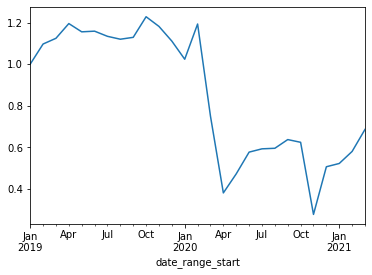

In [120]:
X = restaurants.groupby("date_range_start")["visitor_count_norm"].mean()

# Normalize by Jan 2019 (could also do Jan 2020)
(X / X.iloc[0]).plot()

<AxesSubplot:xlabel='date_range_start'>

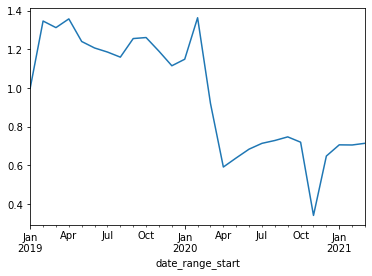

In [121]:
X = restaurants.groupby("date_range_start")["visit_count_norm"].mean()

# Normalize by Jan 2019 (could also do Jan 2020)
(X / X.iloc[0]).plot()

Let's check grocery stores:

In [122]:
grocery_stores = philly_patterns.query("top_category == 'Grocery Stores'")

<AxesSubplot:xlabel='date_range_start'>

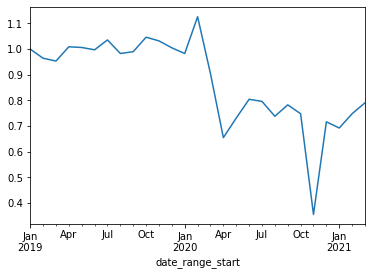

In [123]:
X = grocery_stores.groupby("date_range_start")["visitor_count_norm"].mean()

# Normalize by Jan 2019 (could also do Jan 2020)
(X / X.iloc[0]).plot()

**Note: "visit_count_norm" seems weird!**

<AxesSubplot:xlabel='date_range_start'>

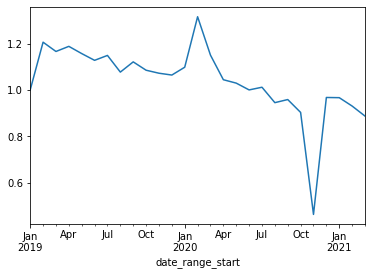

In [124]:
X = grocery_stores.groupby("date_range_start")["visit_count_norm"].mean()

# Normalize by Jan 2019 (could also do Jan 2020)
(X / X.iloc[0]).plot()

#### Analysis

In [125]:
mask = philly_patterns['date_range_start'] < '2020-03-01' 
prepandemic = philly_patterns.loc[mask].copy()
pandemic = philly_patterns.loc[~mask].copy()

In [126]:
prepandemic.date_range_start.unique()

array(['2019-03-01T00:00:00.000000000', '2019-04-01T00:00:00.000000000',
       '2019-05-01T00:00:00.000000000', '2019-02-01T00:00:00.000000000',
       '2019-11-01T00:00:00.000000000', '2019-10-01T00:00:00.000000000',
       '2019-07-01T00:00:00.000000000', '2019-09-01T00:00:00.000000000',
       '2019-08-01T00:00:00.000000000', '2019-01-01T00:00:00.000000000',
       '2019-06-01T00:00:00.000000000', '2019-12-01T00:00:00.000000000',
       '2020-02-01T00:00:00.000000000', '2020-01-01T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [127]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [129]:
def cut_outliers(df, cols):
    for col in cols:
        ub = 2*df[col].quantile(0.99)
        mask = df[col] > ub
        df.loc[mask,col] = ub
    return df

def make_dummies(df):
    return pd.get_dummies(df)
    

def Stdrshp(df, pivot_cols, constant_cols): 
    constant = df.loc[
        df.groupby('safegraph_place_id').cumcount() == 0,
        ['safegraph_place_id']+constant_cols
    ]
    constant.set_index('safegraph_place_id', inplace = True)
    #constant = make_dummies(constant)
    pivoted = df.pivot_table(index='safegraph_place_id', columns='date_range_start')[pivot_cols]
    new_cols = [('{1} {0}'.format(*tup)) for tup in pivoted.columns]
    pivoted.columns = new_cols
    df = pivoted.join(race_data[['black_pct', 'white_pct']])
    df = df.fillna(0)
    scaled = StandardScaler().fit_transform(df)
    scaled_features_df = pd.DataFrame(scaled, index=df.index, columns=df.columns)
    return scaled_features_df

def make_clusters(df, k = 5):
    kmeans = KMeans(n_clusters=k, n_init=50).fit(df) # NH NOTE: USE HIGHER N_INIT TO AVOID RANDOMNESS
    df['cluster'] = kmeans.labels_
    return (df, kmeans.inertia_)

def run_Kmeans(df, pivot_cols, constant_cols, k = 5):
    normalized = Stdrshp(cut_outliers(df, pivot_cols), pivot_cols, constant_cols)
    return make_clusters(normalized, k)

In [130]:
pivot_cols = ["visitor_count_norm"] ## NH NOTE: try using visitor_count_norm only
constant_cols = []  #'B19013e1','income_missing']

In [131]:
import matplotlib.pyplot as plt

3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39


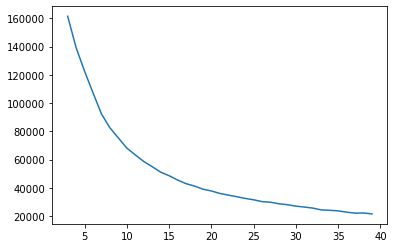

In [132]:
scaled = Stdrshp(philly_patterns, pivot_cols, constant_cols)
n_clusters = [k for k in range(3,40)]
inertias = []
for k in n_clusters:
    print(k)
    df, inertia = make_clusters(scaled, k = k)
    inertias.append(inertia)
    
plt.plot(n_clusters,inertias)

In [134]:
scaled.head()

,2019-01-01 00:00:00 visitor_count_norm,2019-02-01 00:00:00 visitor_count_norm,2019-03-01 00:00:00 visitor_count_norm,2019-04-01 00:00:00 visitor_count_norm,2019-05-01 00:00:00 visitor_count_norm,2019-06-01 00:00:00 visitor_count_norm,2019-07-01 00:00:00 visitor_count_norm,2019-08-01 00:00:00 visitor_count_norm,2019-09-01 00:00:00 visitor_count_norm,2019-10-01 00:00:00 visitor_count_norm,2019-11-01 00:00:00 visitor_count_norm,2019-12-01 00:00:00 visitor_count_norm,2020-01-01 00:00:00 visitor_count_norm,2020-02-01 00:00:00 visitor_count_norm,2020-03-01 00:00:00 visitor_count_norm,2020-04-01 00:00:00 visitor_count_norm,2020-05-01 00:00:00 visitor_count_norm,2020-06-01 00:00:00 visitor_count_norm,2020-07-01 00:00:00 visitor_count_norm,2020-08-01 00:00:00 visitor_count_norm,2020-09-01 00:00:00 visitor_count_norm,2020-10-01 00:00:00 visitor_count_norm,2020-11-01 00:00:00 visitor_count_norm,2020-12-01 00:00:00 visitor_count_norm,2021-01-01 00:00:00 visitor_count_norm,2021-02-01 00:00:00 visitor_count_norm,2021-03-01 00:00:00 visitor_count_norm,black_pct,white_pct,cluster
safegraph_place_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
sg:00018e7b1ba449278dd1c33a2348e5fa,-0.099422,-0.096384,-0.110702,-0.121672,-0.106915,-0.103068,-0.089016,-0.083370,-0.076017,-0.112556,-0.098593,-0.098209,-0.090389,-0.108137,-0.142310,-0.217155,-0.060013,-0.057745,-0.091538,-0.064894,-0.084813,-0.063235,-0.049110,-0.093948,-0.081712,-0.096979,-0.075958,-1.161882,1.214429,10
sg:0001da921b9d488986c0bdf83bfaff4b,-0.120942,-0.129137,-0.130080,-0.130425,-0.133672,-0.116330,-0.105796,-0.096225,-0.104851,-0.148421,-0.136772,-0.130803,-0.148127,-0.164134,-0.154351,-0.180148,-0.148884,-0.165714,-0.149878,-0.107467,-0.137039,-0.123745,-0.088750,-0.104405,-0.101953,-0.110703,-0.098447,-1.185320,1.177509,10
sg:0003e5a379604393b0dc6e9bce0058b2,0.034229,0.030847,0.032083,0.024214,0.048844,0.028664,0.050162,0.035182,0.017862,0.071715,0.063033,0.054287,0.087540,0.100221,0.128630,0.276280,0.211277,0.201381,0.130712,0.150335,0.088481,0.155531,0.028583,0.096889,0.080217,0.088287,0.118942,1.716929,-1.265757,5
sg:0004189674c64e108e4b5ea2baa68eb9,-0.073371,-0.077489,-0.082145,-0.087632,-0.095448,-0.069472,-0.054468,-0.067658,-0.070652,-0.096479,-0.097320,-0.102865,-0.096280,-0.113346,-0.092136,-0.099964,-0.158239,-0.154917,-0.124875,-0.121658,-0.137039,-0.133054,-0.096678,-0.120091,-0.101953,-0.155304,-0.128432,0.550476,-0.543235,28
sg:0008547f38f54091836959120205256c,0.146361,0.134143,0.074919,0.101047,0.177847,0.120610,0.057072,0.043752,0.032614,0.053164,0.122847,0.092702,0.155883,0.354159,0.375487,0.152921,0.173858,0.194183,0.255727,0.204734,0.221420,0.204404,0.034925,0.083818,0.098209,0.112303,0.061472,-0.177579,0.074421,0


In [135]:
from kneed import KneeLocator

In [136]:
# Initialize the knee algorithm
kn = KneeLocator(n_clusters, inertias, curve='convex', direction='decreasing')

In [137]:
OPTIMAL_CLUSTERS = kn.knee
OPTIMAL_CLUSTERS

12

In [138]:
philly_patterns_clustered, pandemic_inertia = run_Kmeans(
    philly_patterns, pivot_cols, constant_cols, k=OPTIMAL_CLUSTERS
)

In [139]:
# prepandemic, prepandemic_inertia = run_Kmeans(
#     prepandemic, pivot_cols, constant_cols, k=OPTIMAL_CLUSTERS
# )
# pandemic, pandemic_inertia = run_Kmeans(
#     philly_patterns, pivot_cols, constant_cols, k=OPTIMAL_CLUSTERS
# )

In [140]:
combined = philly_patterns_clustered.copy()

In [141]:
combined[['cluster']].to_csv(DATA_DIR / 'processed' / 'sg_clusters.csv', index = True)

In [53]:
# # We want to compare pandemic_inertia to the inertia we would have in 2020 if we used the
# # 2019 clustering
# combined = pandemic.join(prepandemic[['cluster']], how='left',rsuffix='pre')
# combined[['clusterpre']] = combined[['clusterpre']].fillna(value=-1)
# combined['clusterpre'] = combined['clusterpre'].astype(int)

In [142]:
cols = combined.columns
cols = cols[:-2]
n = len(combined.columns)

In [143]:
def get_inertia(df, cols, cluster_col):
    mask = df[cluster_col] > -1
    n = len(df.index)
    filtered = df[mask]
    m = len(filtered.index)
    se = ((df[cols] - df.groupby(cluster_col)[cols].transform('mean'))**2).to_numpy().sum()
    return se*(n/m)

get_inertia(combined, cols, 'cluster')

78895.94651844304

In [144]:
#worst case scenario
combined['newcol'] = 1
get_inertia(combined, cols, 'newcol')

484511.9999999998

In [145]:
combined.groupby('cluster').size()

cluster
0     6027
1      363
2       54
3      543
4     3631
5      439
6       86
7     3089
8       48
9      179
10    1769
11    1076
dtype: int64

In [146]:
# combined.groupby('clusterpre').size()

**NH**: Plot the mean value over time by cluster

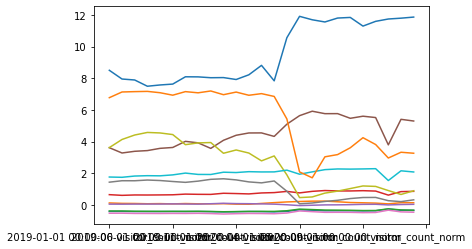

In [147]:
fig, ax = plt.subplots()
for cluster_num in combined['cluster'].unique():
    cluster = combined.query(f"cluster == {cluster_num}")
    cluster[cluster.columns[:-6]].T.mean(axis=1).plot(ax=ax, legend=False)

**NH:** seems like it sort of worked in terms of differentiating both by overall foot traffic and the shape of the traffic over time

In [148]:
big_cats = philly_patterns.groupby('top_category').size().sort_values(ascending = False)[:5]

In [149]:
big_cats = big_cats.index

In [150]:
def category_groups(x):
    if x in big_cats: 
        return x 
    else: 
        return 'other'

In [151]:
philly_patterns['top_category_simple'] = philly_patterns.top_category.apply(category_groups)

In [152]:
philly_patterns['top_category_simple'].unique()

array(['Grocery Stores', 'other', 'Restaurants and Other Eating Places',
       'Health and Personal Care Stores', 'Child Day Care Services',
       'Religious Organizations'], dtype=object)

In [153]:
mask = philly_patterns['date_range_start'] < '2020-03-01' 
cats = philly_patterns.loc[~mask,].copy()
cats = cats.loc[
        cats.groupby('safegraph_place_id').cumcount() == 0,
        ['safegraph_place_id', 'top_category_simple']
    ]

In [154]:
# combined.drop(columns = 'top_category_simple', inplace = True)

In [155]:
combined = combined.join(cats.set_index('safegraph_place_id'), how = 'left')

In [156]:
pd.crosstab(combined.cluster, combined.top_category_simple, dropna=False)

top_category_simple,Child Day Care Services,Grocery Stores,Health and Personal Care Stores,Religious Organizations,Restaurants and Other Eating Places,other
cluster,,,,,,
0,237,168,179,356,711,4290
1,0,37,23,1,136,166
2,0,1,0,0,0,53
3,8,9,9,0,258,254
4,461,111,119,517,216,2155
5,12,1,3,14,4,229
6,0,25,2,0,11,48
7,56,163,107,38,1139,1585
8,0,1,0,0,9,38


In [69]:
len(combined)

17304